> **Before the beginning I want to say that I hope you find this notebook helpful and some UPVOTES would be very much appreciated. Thanks a lot.**

# **Movie Recommendation System**
1. **Content Based Recommendation System**
2. **Popularity Based Recommendation System**
3. **Collaborative Recommendation System**
-
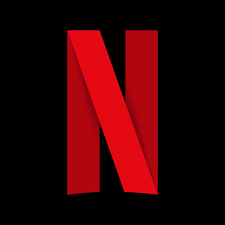
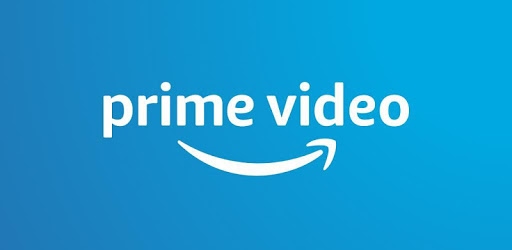

# **Work Flow**
> 1. **Data**
> 2. **Data Preprocessing**
> 3. **Feature Extraction**
> 4. **User input**
> 5. **Cosine Similarity Algorithm**
> 6. **List of Movies**

 **Importings**

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

**Data Collection and Pre-Processing**

In [ ]:
movies_data = pd.read_csv('../input/movie-dataset/movie_dataset.csv')

In [ ]:
movies_data.head()

In [ ]:
movies_data.tail()

In [ ]:
movies_data.shape

In [ ]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
selected_features

> textual data contains a lot of missing values called as null values and we need to replace this with null string 

In [ ]:
#replacing the null values with null string

for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
#combining all the 5 selected features

combined_feature = movies_data['genres']+' '+ movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [ ]:
combined_feature

**Converting the text data to feature vectors**

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_feature)

In [ ]:
print(feature_vectors)

**Cosine Similarity**

In [ ]:
# getting the similarity score using cosine similarty

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

In [ ]:
similarity.shape

**Getting the movie name from the user**

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

**Creating a list with all the movie names given in the dataset**

In [ ]:
list_of_all_titles = movies_data['title'].tolist()
list_of_all_titles

**Finding the best match for the movie from by user**

In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
find_close_match

In [ ]:
close_match = find_close_match[0]
close_match

**Finding the index of the movie based on title**

In [ ]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
index_of_the_movie

**Getting a list of similar movies**

In [ ]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

In [ ]:
len(similarity_score)

**Sorting the movies based on their similarity score**

In [ ]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

**Print the name of similar movies based on the index**

In [ ]:
print('Movies suggested for you :  \n')

i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if (i<30):
        print(i,'.',title_from_index)
        i+=1

> # **Movie Recommendation System**

In [ ]:
movie_name = input(' Write the name of the movie you liked : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you :  \n')

i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if (i<30):
        print(i,'.',title_from_index)
        i+=1



# **References**

1. https://youtu.be/7rEagFH9tQg